<a href="https://colab.research.google.com/github/VictoriaOAbel/Analyses/blob/main/Udemy_Build_a_Portfolio_of_5_Data_Analysis_Projects_with_Python%2C_Seaborn%2CPandas%2CPlotly%2C_numpy_etc_%26_get_a_job_of_Data_Analyst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project 1: Uber New York Data Analysis**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

How to Read data for Analysis

In [ ]:
os.listdir("/content/Uber")

['other-American_B01362.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-janjune-15.csv',
 'other-Lyft_B02510.csv',
 'other-Diplo_B01196.csv',
 'other-Federal_02216.csv',
 'uber-raw-data-sep14.csv',
 'uber-raw-data-aug14.csv',
 'other-Prestige_B01338.csv',
 'other-Highclass_B01717.csv',
 'uber-raw-data-jun14.csv',
 'other-Skyline_B00111.csv',
 'other-Carmel_B00256.csv',
 'other-FHV-services_jan-aug-2015.csv',
 'other-Dial7_B00887.csv',
 'uber-raw-data-apr14.csv',
 'uber-raw-data-jul14.csv',
 'Uber-Jan-Feb-FOIL.csv',
 'uber-raw-data-janjune-15_sample.csv',
 'other-Firstclass_B01536.csv']

In [ ]:
uber_15 = pd.read_csv(r"/content/Uber/uber-raw-data-janjune-15_sample.csv")
uber_15

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-02 21:43:00,B02764,237.0
1,B02682,2015-01-20 19:52:59,B02682,231.0
2,B02617,2015-03-19 20:26:00,B02617,161.0
3,B02764,2015-04-10 17:38:00,B02764,107.0
4,B02764,2015-03-23 07:03:00,B00111,140.0
...,...,...,...,...
54237,B02598,2015-06-20 17:33:00,B02598,256.0
54238,B02598,2015-02-08 01:15:51,B02598,50.0
54239,B02764,2015-04-20 22:37:00,B02764,229.0
54240,B02682,2015-02-27 09:23:13,B02682,162.0


In [ ]:
uber_15.shape

(54242, 4)

Performing Data Pre-processing/Data Cleaning

In [ ]:
#Data Cleaning

In [ ]:
type(uber_15)

pandas.core.frame.DataFrame

In [ ]:
uber_15.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
54237    False
54238    False
54239    False
54240    False
54241    False
Length: 54242, dtype: bool

In [ ]:
uber_15.duplicated().sum()

15

In [ ]:
uber_15.drop_duplicates(inplace=True)

In [ ]:
uber_15.duplicated().sum()

0

In [ ]:
uber_15.shape

(54227, 4)

In [ ]:
uber_15.dtypes

Dispatching_base_num     object
Pickup_date              object
Affiliated_base_num      object
locationID              float64
dtype: object

In [ ]:
uber_15.isnull()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
54237,False,False,False,False
54238,False,False,False,False
54239,False,False,False,False
54240,False,False,False,False


In [ ]:
uber_15.isnull().sum()

Dispatching_base_num      0
Pickup_date               1
Affiliated_base_num     589
locationID                1
dtype: int64

In [ ]:
uber_15['Pickup_date']

0        2015-05-02 21:43:00
1        2015-01-20 19:52:59
2        2015-03-19 20:26:00
3        2015-04-10 17:38:00
4        2015-03-23 07:03:00
                ...         
54237    2015-06-20 17:33:00
54238    2015-02-08 01:15:51
54239    2015-04-20 22:37:00
54240    2015-02-27 09:23:13
54241                    NaN
Name: Pickup_date, Length: 54227, dtype: object

In [ ]:
uber_15['Pickup_date'][0]

'2015-05-02 21:43:00'

In [ ]:
type(uber_15['Pickup_date'][0])

str

In [ ]:
uber_15['Affiliated_base_num']

0        B02764
1        B02682
2        B02617
3        B02764
4        B00111
          ...  
54237    B02598
54238    B02598
54239    B02764
54240    B02682
54241       NaN
Name: Affiliated_base_num, Length: 54227, dtype: object

In [ ]:
uber_15['Pickup_date'] = pd.to_datetime(uber_15['Pickup_date'])

In [ ]:
uber_15['Pickup_date'].dtype

dtype('<M8[ns]')

In [ ]:
uber_15['Pickup_date'][0]

Timestamp('2015-05-02 21:43:00')

In [ ]:
type(uber_15['Pickup_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
uber_15.dtypes

Dispatching_base_num            object
Pickup_date             datetime64[ns]
Affiliated_base_num             object
locationID                     float64
dtype: object

Analysing Which Month has Max Uber Pickups

In [ ]:
#Which month has the maximum Uber pickups in New York City

In [ ]:
uber_15

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-02 21:43:00,B02764,237.0
1,B02682,2015-01-20 19:52:59,B02682,231.0
2,B02617,2015-03-19 20:26:00,B02617,161.0
3,B02764,2015-04-10 17:38:00,B02764,107.0
4,B02764,2015-03-23 07:03:00,B00111,140.0
...,...,...,...,...
54237,B02598,2015-06-20 17:33:00,B02598,256.0
54238,B02598,2015-02-08 01:15:51,B02598,50.0
54239,B02764,2015-04-20 22:37:00,B02764,229.0
54240,B02682,2015-02-27 09:23:13,B02682,162.0


In [ ]:
#Extract month
uber_15['Pickup_date'].dt.month

0        5.0
1        1.0
2        3.0
3        4.0
4        3.0
        ... 
54237    6.0
54238    2.0
54239    4.0
54240    2.0
54241    NaN
Name: Pickup_date, Length: 54227, dtype: float64

In [ ]:
uber_15['month'] = uber_15['Pickup_date'].dt.month_name()

In [ ]:
uber_15['month']

0             May
1         January
2           March
3           April
4           March
           ...   
54237        June
54238    February
54239       April
54240    February
54241         NaN
Name: month, Length: 54227, dtype: object

In [ ]:
uber_15['month'].value_counts()

month
June        10613
May         10125
March        8666
April        8633
February     8574
January      7615
Name: count, dtype: int64

<Axes: xlabel='month'>

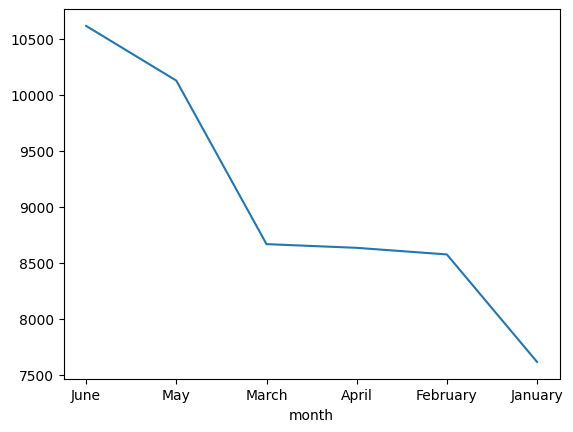

In [ ]:
uber_15['month'].value_counts().plot()

<Axes: xlabel='month'>

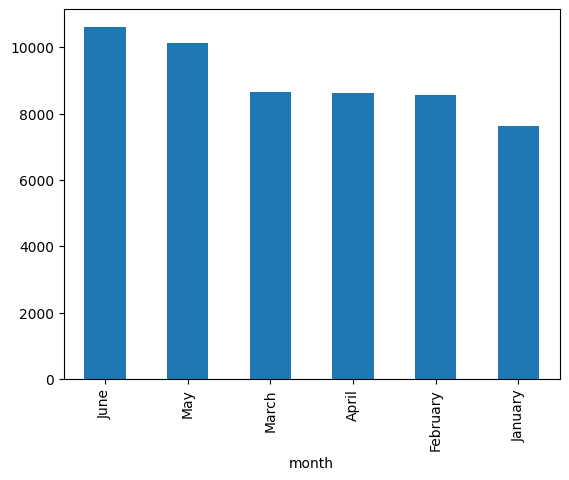

In [ ]:
uber_15['month'].value_counts().plot(kind='bar')

In [ ]:
uber_15['Pickup_date'].dt.day_name()

0        Saturday
1         Tuesday
2        Thursday
3          Friday
4          Monday
           ...   
54237    Saturday
54238      Sunday
54239      Monday
54240      Friday
54241         NaN
Name: Pickup_date, Length: 54227, dtype: object

In [ ]:
uber_15['Pickup_date'].dt.day

0         2.0
1        20.0
2        19.0
3        10.0
4        23.0
         ... 
54237    20.0
54238     8.0
54239    20.0
54240    27.0
54241     NaN
Name: Pickup_date, Length: 54227, dtype: float64

In [ ]:
uber_15['Pickup_date'].dt.hour

0        21.0
1        19.0
2        20.0
3        17.0
4         7.0
         ... 
54237    17.0
54238     1.0
54239    22.0
54240     9.0
54241     NaN
Name: Pickup_date, Length: 54227, dtype: float64

In [ ]:
uber_15['Pickup_date'].dt.minute

0        43.0
1        52.0
2        26.0
3        38.0
4         3.0
         ... 
54237    33.0
54238    15.0
54239    37.0
54240    23.0
54241     NaN
Name: Pickup_date, Length: 54227, dtype: float64

In [ ]:
uber_15['weekday'] = uber_15['Pickup_date'].dt.day_name()
uber_15['day'] = uber_15['Pickup_date'].dt.day
uber_15['hour'] = uber_15['Pickup_date'].dt.hour
uber_15['minute'] = uber_15['Pickup_date'].dt.minute

In [ ]:
uber_15.head(4)

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,month,weekday,day,hour,minute
0,B02617,2015-05-02 21:43:00,B02764,237,May,Saturday,2,21,43
1,B02682,2015-01-20 19:52:59,B02682,231,January,Tuesday,20,19,52
2,B02617,2015-03-19 20:26:00,B02617,161,March,Thursday,19,20,26
3,B02764,2015-04-10 17:38:00,B02764,107,April,Friday,10,17,38


In [ ]:
pd.crosstab(index=uber_15['month'], columns=uber_15['weekday'])

weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
month,,,,,,,
April,2365,1833,2508,2052,2823,1880,2521
February,2655,1970,2550,2183,2396,2129,2013
January,2508,1353,2745,1651,2378,1444,1740
June,2793,2848,3037,2485,2767,3187,2503
March,2465,2115,2522,2379,2093,2388,2007
May,3262,1865,3519,2944,2627,2115,2328


In [ ]:
pivot = pd.crosstab(index=uber_15['month'], columns=uber_15['weekday'])
pivot

weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
month,,,,,,,
April,2365,1833,2508,2052,2823,1880,2521
February,2655,1970,2550,2183,2396,2129,2013
January,2508,1353,2745,1651,2378,1444,1740
June,2793,2848,3037,2485,2767,3187,2503
March,2465,2115,2522,2379,2093,2388,2007
May,3262,1865,3519,2944,2627,2115,2328


<Axes: xlabel='month'>

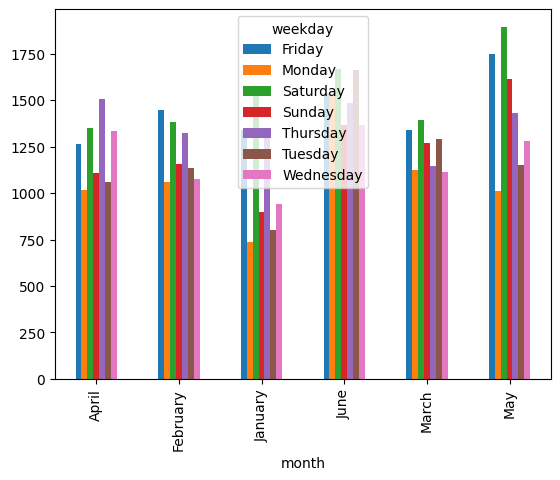

In [ ]:
pivot.plot(kind='bar')

<Axes: xlabel='month'>

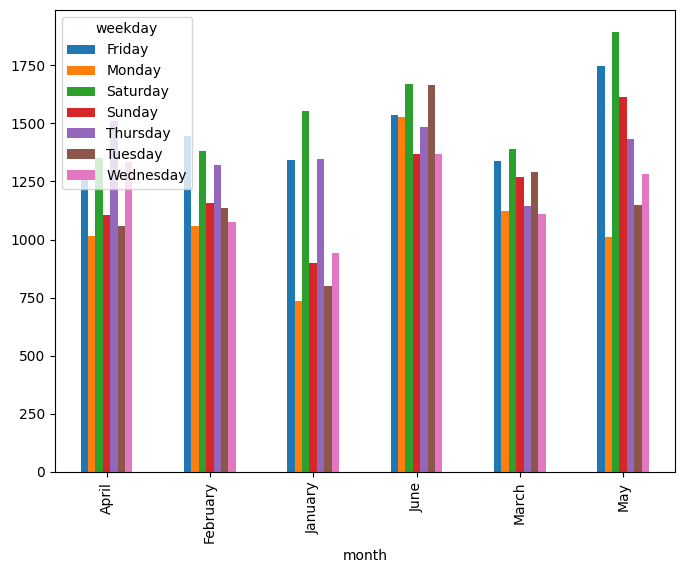

In [ ]:
pivot.plot(kind='bar', figsize=(8,6))

Analysing Hourly Rush in New York

In [ ]:
uber_15.groupby(['weekday', 'hour'], as_index=False).size()

,weekday,hour,size
0,Friday,0,581
1,Friday,1,333
2,Friday,2,197
3,Friday,3,138
4,Friday,4,161
...,...,...,...
163,Wednesday,19,1044
164,Wednesday,20,897
165,Wednesday,21,949
166,Wednesday,22,900


In [ ]:
summary = uber_15.groupby(['weekday', 'hour'], as_index=False).size()
summary

,weekday,hour,size
0,Friday,0,581
1,Friday,1,333
2,Friday,2,197
3,Friday,3,138
4,Friday,4,161
...,...,...,...
163,Wednesday,19,1044
164,Wednesday,20,897
165,Wednesday,21,949
166,Wednesday,22,900


<Axes: xlabel='hour', ylabel='size'>

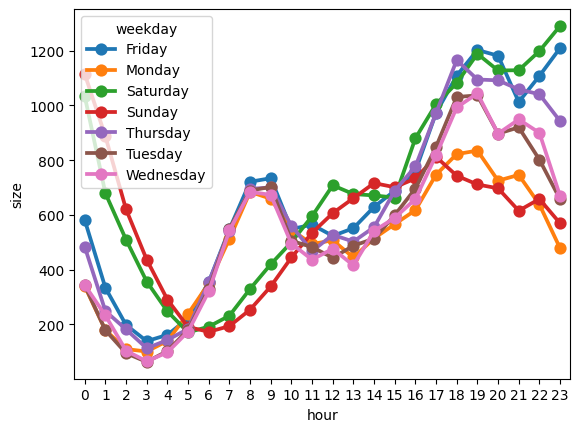

In [ ]:
sns.pointplot(x='hour', y='size', hue='weekday', data=summary)

<Axes: xlabel='hour', ylabel='size'>

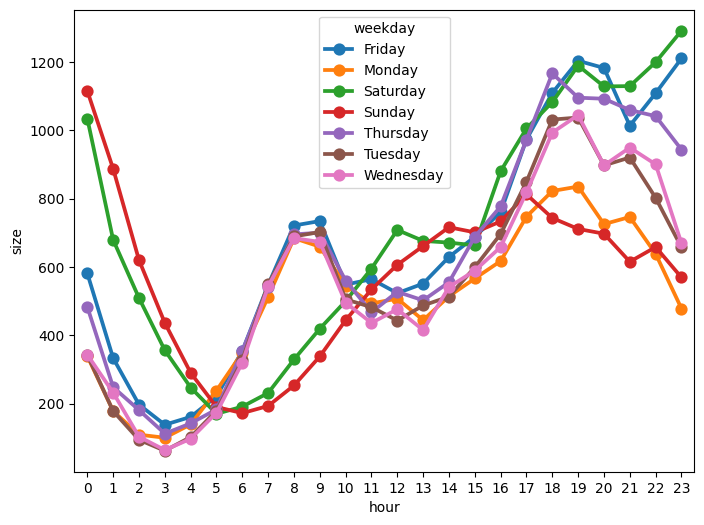

In [ ]:
# Peak or Rush Days at which Hour
plt.figure(figsize=(8,6))
sns.pointplot(x='hour', y='size', hue='weekday', data=summary)

Analysing Most Active Base-number

In [ ]:
#Which Base Number has most number of active vehicles
os.listdir("/content/Uber")

['uber-raw-data-janjune-15_sample.csv',
 'other-Prestige_B01338.csv',
 'uber-raw-data-may14.csv',
 'other-Diplo_B01196.csv',
 'other-Lyft_B02510.csv',
 'other-FHV-services_jan-aug-2015.csv',
 'other-Carmel_B00256.csv',
 'other-Dial7_B00887.csv',
 'uber-raw-data-jul14.csv',
 'other-Highclass_B01717.csv',
 'other-Firstclass_B01536.csv',
 'uber-raw-data-aug14.csv',
 'Uber-Jan-Feb-FOIL.csv',
 'other-American_B01362.csv',
 'other-Federal_02216.csv',
 'uber-raw-data-sep14.csv',
 'other-Skyline_B00111.csv',
 'uber-raw-data-apr14.csv',
 'uber-raw-data-janjune-15.csv',
 'uber-raw-data-jun14.csv']

In [ ]:
uber_foil = pd.read_csv(r"/content/Uber/Uber-Jan-Feb-FOIL.csv")

In [ ]:
uber_foil.shape

(354, 4)

In [ ]:
uber_foil.head()

,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765
2,B02764,1/1/2015,3427,29421
3,B02682,1/1/2015,945,7679
4,B02617,1/1/2015,1228,9537


In [ ]:
#Box Plot

In [ ]:
!pip install chart_studio
!pip install plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 1.0 MB/s eta 0:00:00


In [ ]:
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.express as px

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [ ]:
init_notebook_mode(connected=True)

In [ ]:
uber_foil.columns

Index(['dispatching_base_number', 'date', 'active_vehicles', 'trips'], dtype='object')

In [ ]:
px.box(x='dispatching_base_number', y='active_vehicles', data_frame=uber_foil)

In [ ]:
#Violin Plot

In [ ]:
px.violin(x='dispatching_base_number', y='active_vehicles', data_frame=uber_foil)

Let's Collect Entire Data: Data Collection

In [ ]:
#Collect entire data and make it ready for the data analysis

In [ ]:
files = os.listdir("/content/Uber")

In [ ]:
files.remove('uber-raw-data-janjune-15.csv')

In [ ]:
files

['uber-raw-data-janjune-15_sample.csv',
 'other-Prestige_B01338.csv',
 'uber-raw-data-may14.csv',
 'other-Diplo_B01196.csv',
 'other-Lyft_B02510.csv',
 'other-FHV-services_jan-aug-2015.csv',
 'other-Carmel_B00256.csv',
 'other-Dial7_B00887.csv',
 'uber-raw-data-jul14.csv',
 'other-Highclass_B01717.csv',
 'other-Firstclass_B01536.csv',
 'uber-raw-data-aug14.csv',
 'Uber-Jan-Feb-FOIL.csv',
 'other-American_B01362.csv',
 'other-Federal_02216.csv',
 'uber-raw-data-sep14.csv',
 'other-Skyline_B00111.csv',
 'uber-raw-data-apr14.csv',
 'uber-raw-data-jun14.csv']

In [ ]:
files.remove('uber-raw-data-janjune-15_sample.csv')

In [ ]:
files

['other-Prestige_B01338.csv',
 'uber-raw-data-may14.csv',
 'other-Diplo_B01196.csv',
 'other-Lyft_B02510.csv',
 'other-FHV-services_jan-aug-2015.csv',
 'other-Carmel_B00256.csv',
 'other-Dial7_B00887.csv',
 'uber-raw-data-jul14.csv',
 'other-Highclass_B01717.csv',
 'other-Firstclass_B01536.csv',
 'uber-raw-data-aug14.csv',
 'Uber-Jan-Feb-FOIL.csv',
 'other-American_B01362.csv',
 'other-Federal_02216.csv',
 'uber-raw-data-sep14.csv',
 'other-Skyline_B00111.csv',
 'uber-raw-data-apr14.csv',
 'uber-raw-data-jun14.csv']

In [ ]:
files.remove('other-Prestige_B01338.csv')
files.remove('other-Diplo_B01196.csv')
files.remove('other-Lyft_B02510.csv')
files.remove('other-FHV-services_jan-aug-2015.csv')
files.remove('other-Carmel_B00256.csv')
files.remove('other-Dial7_B00887.csv')
files.remove('other-Highclass_B01717.csv')
files.remove('other-Firstclass_B01536.csv')
files.remove('Uber-Jan-Feb-FOIL.csv')
files.remove('other-American_B01362.csv')
files.remove('other-Federal_02216.csv')
files.remove('other-Skyline_B00111.csv')

In [ ]:
files

['uber-raw-data-may14.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-sep14.csv',
 'uber-raw-data-apr14.csv',
 'uber-raw-data-jun14.csv']

In [ ]:
final = pd.DataFrame()

path = r"/content/Uber"

for file in files :
   current_df = pd.read_csv(path+'/'+file)
   final = pd.concat([current_df, final])

NameError: name 'pd' is not defined

In [ ]:
## path = "/content/Uber"
## files = os.listdir(path)

## final = pd.DataFrame()

## for file in files:
    ## if file.endswith('.csv'):  # Ensure only CSV files are processed
        ## current_df = pd.read_csv(os.path.join(path, file))
        ## final = pd.concat([final, current_df], ignore_index=True)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 115594: invalid start byte

In [ ]:
final.shape

In [ ]:
final.duplicated().sum()

In [ ]:
final.drop_duplicates(inplace=True)

In [ ]:
final.shape

In [ ]:
final.head()

Perform Spatial Analysis to find rush of Uber Pick-ups

In [ ]:
# At what locations in New York City are we getting rush?

In [ ]:
rush_uber = final.groupby(['Lat', 'Lon'], as_index=False).size()

In [ ]:
rush_uber.head(6)

In [ ]:
!pip install folium

In [ ]:
import folium

In [ ]:
basemap = folium.Map()

In [ ]:
basemap

In [ ]:
from folium.plugins import HeatMap

In [ ]:
HeatMap(rush_uber).add_to(basemap)

OR

In [ ]:
import folium
from folium.plugins import HeatMap
import pandas as pd

In [ ]:
data = pd.DataFrame({
    'lat': [39.6569, 39.6686, 39.7214, 39.8416, 39.9055, 39.9196],
    'lon': [-74.2258, -74.1607, -74.2446, -74.1512, -74.0791, -74.1112]
})

In [ ]:
heat_data = data[['lat', 'lon']].values.tolist()

In [ ]:
m = folium.Map(location=[37.7749, -122.4194], zoom_start=13)

In [ ]:
HeatMap(heat_data).add_to(m)

In [ ]:
m

Perform Pair-wise Analysis to figure out Rush

In [ ]:
# Examine rush on Hour and Weekday (Perform Pair wise Analysis)

In [ ]:
final.columns

In [ ]:
final.head(3)

In [ ]:
final.dtypes

In [ ]:
final['Date/Time'][0]

In [ ]:
final['Date/Time'] = pd.to_datetime(final['Date/Time'], format="%m/%d/%Y %H:%M:%S")

In [ ]:
final['Date/Time'].dtype

In [ ]:
final['day'] = final['Date/Time'].dt.day
final['hour'] = final['Date/Time'].dt.hour

In [ ]:
final.head(4)

In [ ]:
final.groupby(['day', 'hour'], as_index=False).size()

In [ ]:
final.groupby(['day', 'hour']).size()

In [ ]:
pivot = final.groupby(['day', 'hour']).size().unstack()

In [ ]:
pivot

In [ ]:
pivot.style.background_gradient()

How to Automate Your Analysis

In [ ]:
# How to Automate your Analysis

In [ ]:
def gen_pivot_table(df, col1, col2):
    pivot = final.groupby([col1, col2]).size().unstack()
    return pivot.style.background_gradient()

In [ ]:
final.columns

In [ ]:
gen_pivot_table(final, "day", "hour")